In [1]:
import spacy
from spacy import displacy
from spacy.tokens import Span

# my ner model that identifies retail accessories & apparel related products
my_nlp = spacy.load("../output_fin/model-best")

# pretrained model for general tasks like parsing sentence
nlp = spacy.load("en_core_web_sm")

In [2]:
from file_manager import FileManager

file_1 = FileManager('../notebook/input/scarf_google.html')
file_content_1 = file_1.read_file()

In [3]:
ent_doc_1 = my_nlp(file_content_1)
ling_doc_1 = nlp(file_content_1)

In [4]:
from token_analysis import DualDocAnalysis

analyzer_1 = DualDocAnalysis(ling_doc=ling_doc_1,ent_doc=ent_doc_1)

#get main product entities from document
# returns potential important linguistic features related to product
ling_info_1 = analyzer_1.get_all_doc_ent_ling_info()
span_info_1 = analyzer_1.get_related_spans()


In [5]:
displacy.render(ent_doc_1, style="ent")

In [6]:
# this model was only trained on google but can also ID and products 
# on an entirely new website: in this example etsy was used
file_2 = FileManager('../notebook/input/scarf_etsy.html')
file_content_2 = file_2.read_file()
ent_doc_2 = my_nlp(file_content_2)
ling_doc_2 = nlp(file_content_2)
analyzer_2 = DualDocAnalysis(ling_doc=ling_doc_2,ent_doc=ent_doc_2)

#get main product entities from document
# returns potential important linguistic features related to product
ling_info_2 = analyzer_2.get_all_doc_ent_ling_info()
span_info_2 = analyzer_2.get_related_spans()
displacy.render(ent_doc_2, style="ent")

In [7]:
import json
from file_manager import JSONFileManager

stats_file = JSONFileManager('../notebook/all_pipeline_stats.json')
stats = stats_file.read_file()


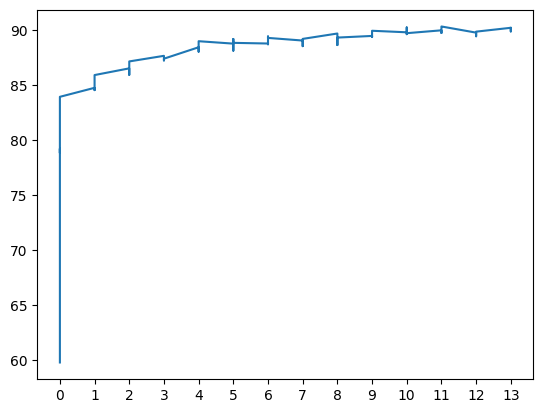

In [10]:
import matplotlib.widgets as wd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# epoch = [n for n in range(len(stats['all']['E']))][1:]

epoch = stats['all']['E']
ents_f = [float(x) for x in stats['all']['ENTS_F']]
ents_r = [float(x) for x in stats['all']['ENTS_R']]
ents_p = [float(x) for x in stats['all']['ENTS_P']]
tok2vec_loss = [float(x) for x in stats['all']['TOK2VEC_LOSS']]
ner_loss = [float(x) for x in stats['all']['NER_LOSS']]

redu

prev = None
start = 0
end = 1



for i, num in enumerate(epoch):
    if prev and prev < num:
        end = i 
        np.mean(ents_f[start:end]))
        
        
        
    
# ENTS_P = Precision = Formula: True Pos / (True pos + True Neg), high == few false positives
# ENTS_R = recall = Formula: True Pos / (True pos + True Neg), high == few false negatives
# ENTS_F = harmony of p and r. This is the MAIN quality score. Formula: F1 = 2 * (P * R) / (P + R)
# ner_loss = loss from NER component based on how far the predicted entity spans are from the gold annotations.
# t = np.arange(0., 5., 0.2)

# plt.figure(figsize=(10, 10))
# plt.scatter(epoch, ents_f, color='blue', label='F-score')
# plt.plot(epoch, ents_f, color='blue', linestyle='--', alpha=0.5)

# plt.scatter(epoch, ents_p, color='green', label='Precision')
# plt.plot(epoch, ents_p, color='green', linestyle='--', alpha=0.5)

# plt.scatter(epoch, ents_r, color='red', label='Recall')
# plt.plot(epoch, ents_r, color='red', linestyle='--', alpha=0.5)
# plt.legend(title='Legend')

# plt.xlabel('Epoch')
# plt.ylabel('Percentage of Quality Guesses per 200 Training Examples')
# plt.title('NER Prediction Analysis')
# plt.grid(True)
fig, ax = plt.subplots()
ax.plot(epoch,ents_f)
plt.show()
